In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

/Users/georgemakris/anaconda/envs/pyfinance/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import quandl

In [3]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')

In [19]:
aapl=quandl.get('WIKI/AAPL',start_date=start,end_date=end,api_key='zeZW2ba38zkWbmBz_ufL') 
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,10793600.0,0.0,1.0,52.613606,53.011999,52.562200,52.848787,75555200.0
2012-01-04,410.0000,414.68,409.28,413.44,9286500.0,0.0,1.0,52.690714,53.292160,52.598184,53.132802,65005500.0
2012-01-05,414.9500,418.55,412.67,418.03,9688200.0,0.0,1.0,53.326858,53.789509,53.033847,53.722681,67817400.0
2012-01-06,419.7700,422.75,419.22,422.40,11367600.0,0.0,1.0,53.946296,54.329267,53.875613,54.284287,79573200.0
2012-01-09,425.5001,427.75,421.35,421.73,14072300.0,0.0,1.0,54.682693,54.971837,54.149348,54.198183,98506100.0


In [20]:
aapl=quandl.get('WIKI/AAPL.11',start_date=start,end_date=end,api_key='zeZW2ba38zkWbmBz_ufL') #11 is 11th column of info
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [21]:
aapl.tail()

,Adj. Close
Date,
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843
2016-12-29,115.288214
2016-12-30,114.389454


In [23]:
cisco=quandl.get('WIKI/CSCO.11',start_date=start,end_date=end,api_key='zeZW2ba38zkWbmBz_ufL') 
ibm=quandl.get('WIKI/IBM.11',start_date=start,end_date=end,api_key='zeZW2ba38zkWbmBz_ufL')
amzn=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end,api_key='zeZW2ba38zkWbmBz_ufL')

In [25]:
aapl.iloc[0]['Adj. Close']

52.848786580038002

In [27]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [28]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [29]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [64]:
#30% in aapl, 20% in cisco, 40% in ibm, 10% in amazon

In [34]:
a=[1,3,4]
b=[2,5,8]
list(zip(a,b))

[(1, 2), (3, 5), (4, 8)]

In [36]:
list(zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   52.848787       1.000000
  2012-01-04   53.132802       1.005374
  2012-01-05   53.722681       1.016536
  2012-01-06   54.284287       1.027162
  2012-01-09   54.198183       1.025533
  2012-01-10   54.392239       1.029205
  2012-01-11   54.303564       1.027527
  2012-01-12   54.154488       1.024706
  2012-01-13   53.951436       1.020864
  2012-01-17   54.579869       1.032755
  2012-01-18   55.146616       1.043479
  2012-01-19   54.971837       1.040172
  2012-01-20   54.014408       1.022056
  2012-01-23   54.928014       1.039343
  2012-01-24   54.028545       1.022323
  2012-01-25   57.402035       1.086156
  2012-01-26   57.141152       1.081220
  2012-01-27   57.481714       1.087664
  2012-01-30   58.218099       1.101598
  2012-01-31   58.664042       1.110036
  2012-02-01   58.626773       1.109331
  2012-02-02   58.489263       1.106729
  2012-02-03   59.075287       1.117817


In [38]:
for stock_df,allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [39]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [40]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values']=stock_df['Allocation']*10000000

In [51]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,3.000000e+06
2012-01-04,53.132802,1.005374,0.301612,3.016122e+06
2012-01-05,53.722681,1.016536,0.304961,3.049607e+06
2012-01-06,54.284287,1.027162,0.308149,3.081487e+06
2012-01-09,54.198183,1.025533,0.307660,3.076599e+06


In [52]:
aapl['Position Values']=round(aapl['Position Values'],2)

In [53]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,3000000.00
2012-01-04,53.132802,1.005374,0.301612,3016122.36
2012-01-05,53.722681,1.016536,0.304961,3049607.28
2012-01-06,54.284287,1.027162,0.308149,3081487.25
2012-01-09,54.198183,1.025533,0.307660,3076599.47


In [57]:
all_pos_vals=[aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]
portfolio_val=pd.concat(all_pos_vals,axis=1)

In [58]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,3000000.00,2.000000e+06,4.000000e+06,1.000000e+06
2012-01-04,3016122.36,2.038647e+06,3.983682e+06,9.915098e+05
2012-01-05,3049607.28,2.031133e+06,3.964788e+06,9.920684e+05
2012-01-06,3081487.25,2.023618e+06,3.919270e+06,1.019997e+06
2012-01-09,3076599.47,2.036500e+06,3.898873e+06,9.973747e+05


In [59]:
portfolio_val.columns=['Apple','Cisco','IBM','Amazon']

In [60]:
portfolio_val.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,3000000.00,2.000000e+06,4.000000e+06,1.000000e+06
2012-01-04,3016122.36,2.038647e+06,3.983682e+06,9.915098e+05
2012-01-05,3049607.28,2.031133e+06,3.964788e+06,9.920684e+05
2012-01-06,3081487.25,2.023618e+06,3.919270e+06,1.019997e+06
2012-01-09,3076599.47,2.036500e+06,3.898873e+06,9.973747e+05


In [61]:
portfolio_val=round(portfolio_val,2)

In [63]:
portfolio_val.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,3000000.00,2000000.00,4000000.00,1000000.00
2012-01-04,3016122.36,2038647.34,3983682.23,991509.80
2012-01-05,3049607.28,2031132.58,3964787.98,992068.37
2012-01-06,3081487.25,2023617.82,3919269.99,1019996.65
2012-01-09,3076599.47,2036500.27,3898872.79,997374.74


In [70]:
portfolio_val['Total']=portfolio_val.sum(axis=1)

In [71]:
portfolio_val.tail()

,Apple,Cisco,IBM,Amazon,Total
Date,,,,,
2016-12-23,6532646.17,3774690.16,4073599.56,4248394.12,18629330.01
2016-12-27,6574133.97,3793235.96,4084106.71,4308775.07,18760251.71
2016-12-28,6546101.67,3761089.90,4060893.23,4312852.59,18680937.39
2016-12-29,6544419.73,3766035.45,4070911.68,4273864.72,18655231.58
2016-12-30,6493400.96,3736362.15,4056006.18,4188515.89,18474285.18


In [81]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

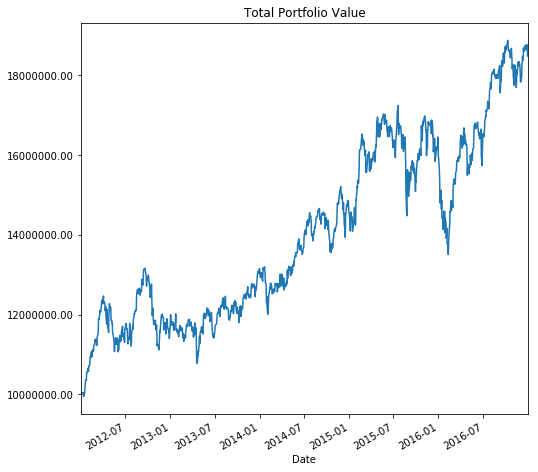

In [86]:
portfolio_val['Total'].plot(figsize=(8,8))
plt.title('Total Portfolio Value')
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

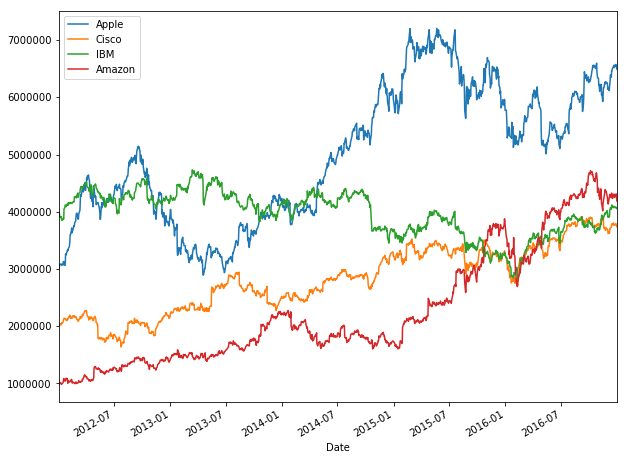

In [88]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

In [89]:
portfolio_val.head()

,Apple,Cisco,IBM,Amazon,Total
Date,,,,,
2012-01-03,3000000.00,2000000.00,4000000.00,1000000.00,10000000.00
2012-01-04,3016122.36,2038647.34,3983682.23,991509.80,10029961.73
2012-01-05,3049607.28,2031132.58,3964787.98,992068.37,10037596.21
2012-01-06,3081487.25,2023617.82,3919269.99,1019996.65,10044371.71
2012-01-09,3076599.47,2036500.27,3898872.79,997374.74,10009347.27


In [98]:
portfolio_val['Daily Return']=portfolio_val['Total'].pct_change(1)

In [99]:
portfolio_val.head()

,Apple,Cisco,IBM,Amazon,Total,Daily Return
Date,,,,,,
2012-01-03,3000000.00,2000000.00,4000000.00,1000000.00,10000000.00,NaN
2012-01-04,3016122.36,2038647.34,3983682.23,991509.80,10029961.73,0.002996
2012-01-05,3049607.28,2031132.58,3964787.98,992068.37,10037596.21,0.000761
2012-01-06,3081487.25,2023617.82,3919269.99,1019996.65,10044371.71,0.000675
2012-01-09,3076599.47,2036500.27,3898872.79,997374.74,10009347.27,-0.003487


In [100]:
portfolio_val['Daily Return'].mean()

0.00054423307120145476

In [101]:
portfolio_val['Daily Return'].std()

0.010568287736321137

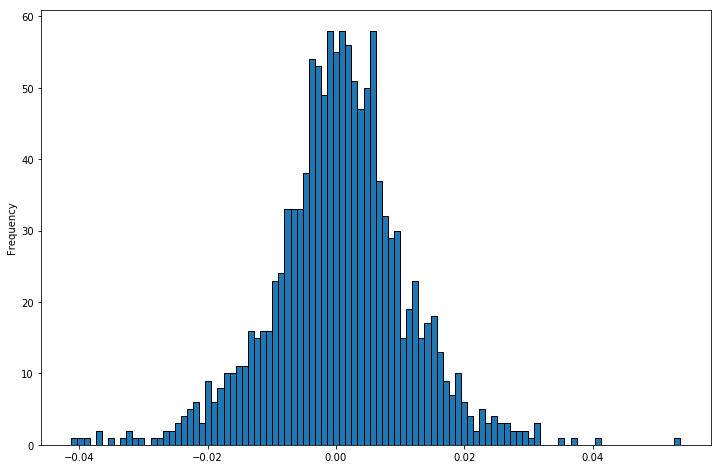

In [103]:
portfolio_val['Daily Return'].plot.hist(bins=100,figsize=(12,8),edgecolor='black')

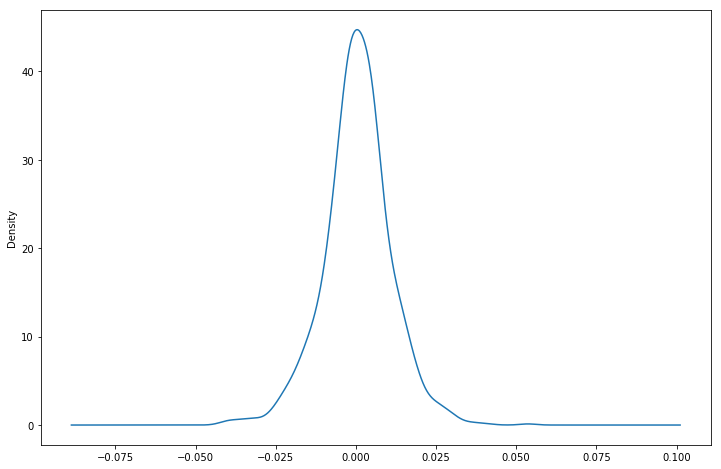

In [105]:
portfolio_val['Daily Return'].plot.kde(figsize=(12,8))

In [108]:
cumulative_return=100*(portfolio_val['Total'][-1]/portfolio_val['Total'][0]-1)

In [109]:
cumulative_return

84.742851800000011

In [110]:
#Assuming Risk free rate is 0 for figuring out Sharpe Ratio
SR=portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [111]:
SR

0.051496806746757301

In [112]:
ASR=(252**0.5)*SR  #Annualized Sharpe Ratio,use 252 since our data is all business days

In [113]:
ASR

0.81748646379523793

In [114]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,3000000.00
2012-01-04,53.132802,1.005374,0.301612,3016122.36
2012-01-05,53.722681,1.016536,0.304961,3049607.28
2012-01-06,54.284287,1.027162,0.308149,3081487.25
2012-01-09,54.198183,1.025533,0.307660,3076599.47


In [115]:
aapl=pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco=pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm=pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn=pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [128]:
stocks=pd.concat([aapl,cisco,ibm,amzn],axis=1)

In [129]:
stocks.columns=['aapl','cisco','ibm','amzn']

In [131]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [132]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [133]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [134]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [136]:
log_return=np.log(stocks/stocks.shift(1))
log_return.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


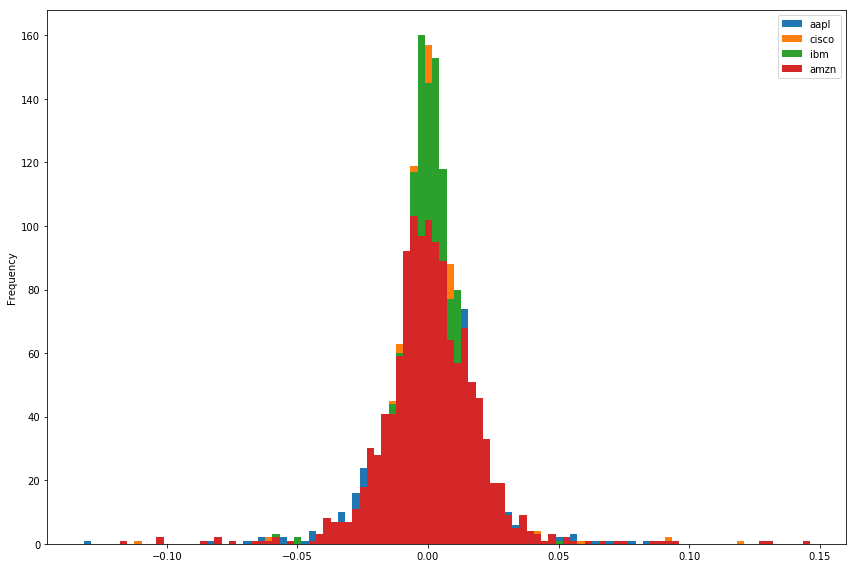

In [138]:
log_return.plot.hist(bins=100,figsize=(12,8))
plt.tight_layout()

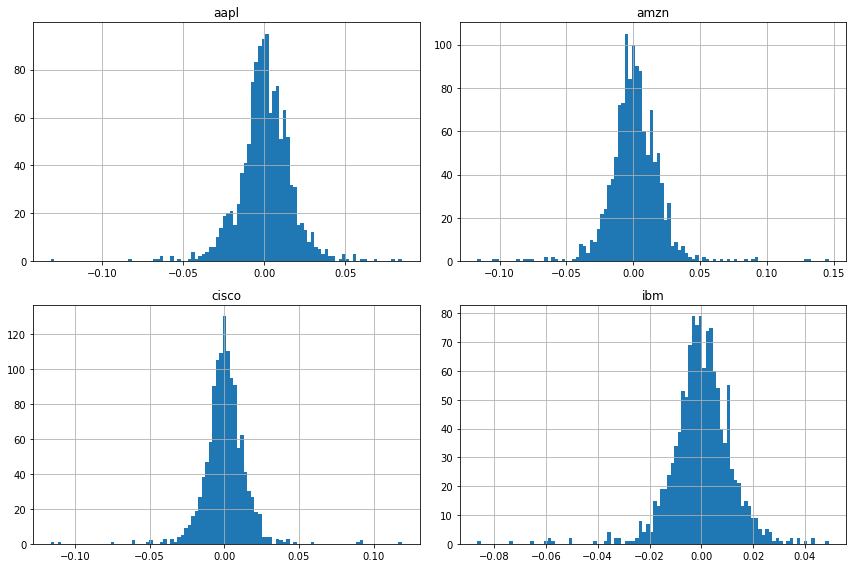

In [139]:
log_return.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [141]:
log_return.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [143]:
log_return.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [144]:
log_return.corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301328,0.294922,0.236312
cisco,0.301328,1.000000,0.423915,0.286434
ibm,0.294922,0.423915,1.000000,0.259051
amzn,0.236312,0.286434,0.259051,1.000000


In [148]:
log_return.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [151]:
np.random.random(4)

array([ 0.41571265,  0.08354475,  0.36658031,  0.56075407])

In [152]:
np.array(np.random.random(4))

array([ 0.33887646,  0.77898737,  0.44582278,  0.5219147 ])

In [167]:
np.random.seed(101)
print(stocks.columns)
weights=np.array(np.random.random(4))
print('Random Weights')
print(weights)
print('Rebalance')
weights=weights/np.sum(weights)
print(weights)

#Expected Return
print('Expected Portfolio Return')
exp_ret=np.sum((log_return.mean()*weights)*252)
print(exp_ret)

#Expected Volatility
print('Expected Volatility')
exp_vol=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
print(exp_vol)


#sharpe ratio
SR=exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[ 0.51639863  0.57066759  0.02847423  0.17152166]
Rebalance
[ 0.40122278  0.44338777  0.02212343  0.13326603]
Expected Portfolio Return
0.155992720496
Expected Volatility
0.185026495659
Sharpe Ratio
0.843083148393


In [158]:
(log_return.mean()*weights)

aapl     2.464708e-04
cisco    2.204471e-04
ibm      2.447205e-07
amzn     1.518561e-04
dtype: float64

In [159]:
(log_return.mean()*weights)*252

aapl     0.062111
cisco    0.055553
ibm      0.000062
amzn     0.038268
dtype: float64

In [160]:
np.sum((log_return.mean()*weights))*252

0.15599272049632004

In [177]:
np.zeros((4,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [182]:
np.arange(1,9,2)

array([1, 3, 5, 7])

In [183]:
np.random.seed(101)

num_ports=5000
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

for ind in range(num_ports):

    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)
    
    #Save weights
    all_weights[ind,:]=weights


    #Expected Return

    ret_arr[ind]=np.sum((log_return.mean()*weights)*252)


    #Expected Volatility

    vol_arr[ind]=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))



    #sharpe ratio
    sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]


In [184]:
sharpe_arr.max()

1.0303260551271067

In [185]:
sharpe_arr.argmax()

1420

In [186]:
all_weights[1420,:]  #so this is optimal weights according to this

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

In [189]:
max_sr_ret=ret_arr[1420]
max_sr_vol=vol_arr[1420]

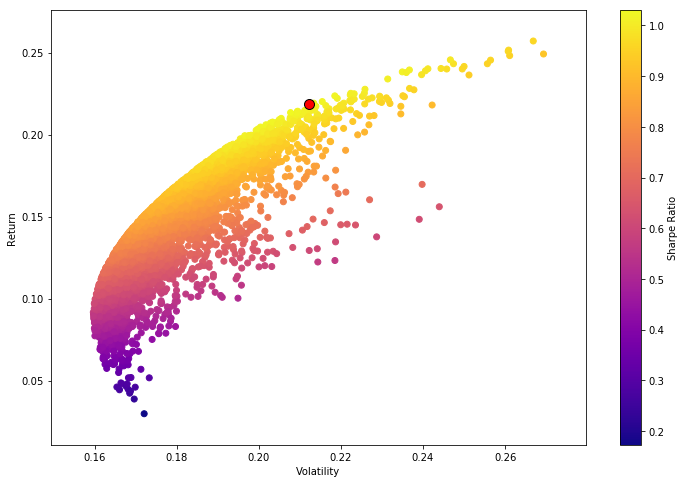

In [191]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,color='red',s=100,edgecolors='black')

In [220]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    ret=np.sum(log_return.mean()*weights)*252
    vol=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr=ret/vol
    return np.array([ret,vol,sr])


In [221]:
from scipy.optimize import minimize

In [222]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1  #index 2 because sr is at index 2 as seen above.  Trying to get max sr, but since this method gets minimum, we multiply by -1


In [223]:
#constraints

def check_sum(weights):
    #return 0 if sum of weights is 1
    return np.sum(weights)-1

In [224]:
cons=({'type':'eq','fun':check_sum})  #so type is equation and function is check_sum

In [225]:
bounds=((0,1),(0,1),(0,1),(0,1))  #4 stocks all with a bound of 0 to 1 for weight

In [226]:
init_guess=[0.25,0.25,0.25,0.25] #first guess of what weight allocations will be

In [227]:
opt_results=minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [228]:
opt_results

     fun: -1.0307168703342362
     jac: array([  5.64455986e-05,   4.18573618e-05,   3.39921728e-01,
        -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  2.66289774e-01,   2.04189831e-01,   7.52707358e-17,
         5.29520395e-01])

In [241]:
opt_results['x']
# or opt_results.x

array([  2.66289774e-01,   2.04189831e-01,   7.52707358e-17,
         5.29520395e-01])

In [231]:
get_ret_vol_sr(opt_results.x)  #returns return at peak sharp ratio, volatilty at peak sharp ratio, and peak sharp ratio

array([ 0.21885915,  0.21233683,  1.03071687])

In [236]:
frontier_y=np.linspace(0,0.3,100)  #finding best y for each x

In [237]:
#function to minimize volatility

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]  #index 1 is the volatility, want to minimize volatility so don't multipy by -1 which was done to get max sharpe ratio

In [244]:
frontier_volatility=[]

for possible_return in frontier_y:
    cons=({'type':'eq','fun':check_sum},{'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result=minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])  #fun is the function value or sharpe ratio as seen above

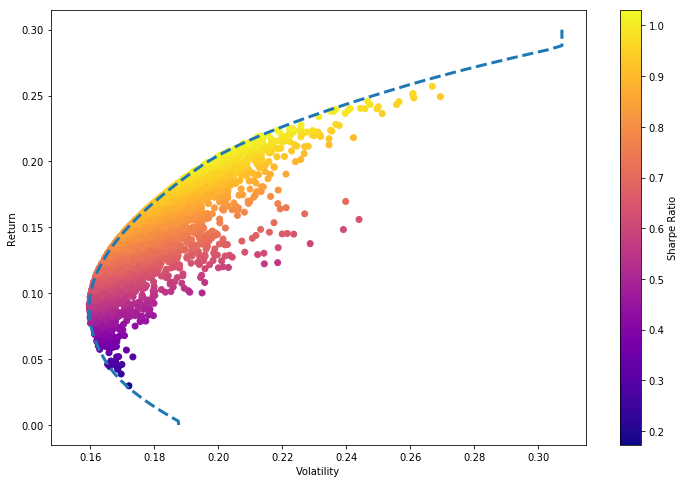

In [249]:
plt.figure(figsize=(12,8))

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,ls='--',linewidth=3)

In [250]:
#capm can be thought of as simple linear regression

In [251]:
from scipy import stats

In [253]:
import pandas_datareader as web

In [256]:
import quandl

In [255]:
spy_etf=web.DataReader('SPY','yahoo')

ConnectionError: HTTPConnectionPool(host='ichart.finance.yahoo.com', port=80): Max retries exceeded with url: /table.csv?s=SPY&a=0&b=1&c=2010&d=1&e=4&f=2018&g=d&ignore=.csv (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x118541978>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [344]:
spy=quandl.get('LSE/SPY5',api_key='zeZW2ba38zkWbmBz_ufL') 
spy.tail()

,Price,High,Low,Volume,Last Close,Change,Var%
Date,,,,,,,
2018-01-19,280.62,280.94,279.71,9832.0,280.62,0.62,0.22
2018-01-22,282.07,282.34,280.71,13265.0,282.07,1.45,0.52
2018-01-25,284.50,285.45,283.84,39095.0,284.50,0.13,0.05
2018-01-26,285.74,285.68,284.77,24232.0,285.74,1.24,0.44
2018-01-29,286.32,287.61,286.65,9348.0,286.32,0.58,0.20


In [345]:
spy[1100:1150]

,Price,High,Low,Volume,Last Close,Change,Var%
Date,,,,,,,
2016-11-02,210.82,211.36,210.80,16213.0,210.82,-0.65,-0.31
2016-11-03,209.88,210.47,209.95,6743.0,209.88,-0.94,-0.45
2016-11-04,210.24,210.13,209.15,13463.0,210.24,0.36,0.17
2016-11-07,212.90,212.92,211.54,12325.0,212.90,2.66,1.26
2016-11-08,214.12,214.08,213.21,4304.0,214.12,1.22,0.57
2016-11-09,216.14,216.14,208.99,108277.0,216.14,2.02,0.94
2016-11-10,216.36,218.82,215.77,142027.0,216.36,0.22,0.10
2016-11-11,215.90,217.80,216.18,4595.0,215.90,-0.46,-0.21
2016-11-14,216.62,217.82,216.34,13947.0,216.62,0.72,0.33


In [346]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1390 entries, 2012-03-21 to 2018-01-29
Data columns (total 7 columns):
Price         1390 non-null float64
High          440 non-null float64
Low           440 non-null float64
Volume        1383 non-null float64
Last Close    1390 non-null float64
Change        440 non-null float64
Var%          440 non-null float64
dtypes: float64(7)
memory usage: 86.9 KB


In [347]:
#spy=spy.dropna()
spy=spy[950:]

In [348]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 440 entries, 2016-03-16 to 2018-01-29
Data columns (total 7 columns):
Price         440 non-null float64
High          439 non-null float64
Low           439 non-null float64
Volume        440 non-null float64
Last Close    440 non-null float64
Change        439 non-null float64
Var%          439 non-null float64
dtypes: float64(7)
memory usage: 27.5 KB


In [349]:
spy.head()

,Price,High,Low,Volume,Last Close,Change,Var%
Date,,,,,,,
2016-03-16,204.29,204.32,202.53,21701.0,202.62,1.67,0.82
2016-03-17,205.74,205.99,204.68,6483.0,204.78,0.96,0.47
2016-03-18,205.08,205.08,204.19,23514.0,206.02,-0.94,-0.46
2016-03-21,204.43,0.00,0.00,27674.0,204.43,0.00,0.00
2016-03-22,205.25,205.25,204.10,99979.0,205.25,0.46,0.22


In [350]:
start=pd.to_datetime('2016-03-16')
end=pd.to_datetime('2018-01-29')

In [351]:
spy.index

DatetimeIndex(['2016-03-16', '2016-03-17', '2016-03-18', '2016-03-21',
               '2016-03-22', '2016-03-29', '2016-03-30', '2016-03-31',
               '2016-04-01', '2016-04-06',
               ...
               '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-22', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='Date', length=440, freq=None)

In [352]:
aapl=quandl.get('WIKI/AAPL',start_date=start,end_date=end,api_key='zeZW2ba38zkWbmBz_ufL') 

In [353]:
aapl.index

DatetimeIndex(['2016-03-16', '2016-03-17', '2016-03-18', '2016-03-21',
               '2016-03-22', '2016-03-23', '2016-03-24', '2016-03-28',
               '2016-03-29', '2016-03-30',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='Date', length=470, freq=None)

In [354]:
spy.index[0]

Timestamp('2016-03-16 00:00:00')

In [355]:
aapl.index[0]

Timestamp('2016-03-16 00:00:00')

In [356]:
for i in aapl.index:
    if i not in spy.index:
        aapl.drop(i,inplace=True)
for i in spy.index:
    if i not in aapl.index:
        spy.drop(i,inplace=True)

In [357]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 430 entries, 2016-03-16 to 2018-01-29
Data columns (total 7 columns):
Price         430 non-null float64
High          429 non-null float64
Low           429 non-null float64
Volume        430 non-null float64
Last Close    430 non-null float64
Change        429 non-null float64
Var%          429 non-null float64
dtypes: float64(7)
memory usage: 26.9 KB


In [358]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 430 entries, 2016-03-16 to 2018-01-29
Data columns (total 12 columns):
Open           430 non-null float64
High           430 non-null float64
Low            430 non-null float64
Close          430 non-null float64
Volume         430 non-null float64
Ex-Dividend    430 non-null float64
Split Ratio    430 non-null float64
Adj. Open      430 non-null float64
Adj. High      430 non-null float64
Adj. Low       430 non-null float64
Adj. Close     430 non-null float64
Adj. Volume    430 non-null float64
dtypes: float64(12)
memory usage: 63.7 KB


In [359]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-03-16,104.61,106.31,104.5900,105.97,38303493.0,0.0,1.0,101.612869,103.264163,101.593442,102.933904,38303493.0
2016-03-17,105.52,106.47,104.9600,105.80,34420705.0,0.0,1.0,102.496797,103.419579,101.952841,102.768775,34420705.0
2016-03-18,106.34,106.50,105.1900,105.92,44205171.0,0.0,1.0,103.293304,103.448720,102.176252,102.885337,44205171.0
2016-03-21,105.93,107.65,105.1401,105.91,35502678.0,0.0,1.0,102.895050,104.565771,102.127781,102.875623,35502678.0
2016-03-22,105.25,107.29,105.2100,106.72,32444375.0,0.0,1.0,102.234533,104.216086,102.195679,103.662416,32444375.0


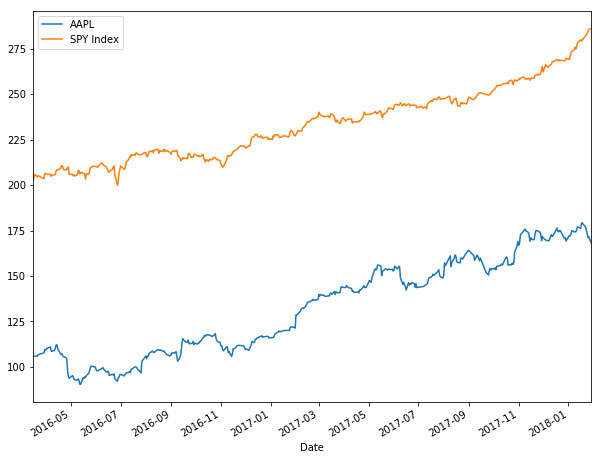

In [360]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy['Last Close'].plot(label='SPY Index')
plt.legend()

In [361]:
aapl['Cumulative']=aapl['Close']/aapl['Close'].iloc[0]
spy['Cumulative']=spy['Last Close']/spy['Last Close'].iloc[0]

In [362]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Cumulative
Date,,,,,,,,,,,,,
2016-03-16,104.61,106.31,104.5900,105.97,38303493.0,0.0,1.0,101.612869,103.264163,101.593442,102.933904,38303493.0,1.000000
2016-03-17,105.52,106.47,104.9600,105.80,34420705.0,0.0,1.0,102.496797,103.419579,101.952841,102.768775,34420705.0,0.998396
2016-03-18,106.34,106.50,105.1900,105.92,44205171.0,0.0,1.0,103.293304,103.448720,102.176252,102.885337,44205171.0,0.999528
2016-03-21,105.93,107.65,105.1401,105.91,35502678.0,0.0,1.0,102.895050,104.565771,102.127781,102.875623,35502678.0,0.999434
2016-03-22,105.25,107.29,105.2100,106.72,32444375.0,0.0,1.0,102.234533,104.216086,102.195679,103.662416,32444375.0,1.007077


In [363]:
spy.head()

,Price,High,Low,Volume,Last Close,Change,Var%,Cumulative
Date,,,,,,,,
2016-03-16,204.29,204.32,202.53,21701.0,202.62,1.67,0.82,1.000000
2016-03-17,205.74,205.99,204.68,6483.0,204.78,0.96,0.47,1.010660
2016-03-18,205.08,205.08,204.19,23514.0,206.02,-0.94,-0.46,1.016780
2016-03-21,204.43,0.00,0.00,27674.0,204.43,0.00,0.00,1.008933
2016-03-22,205.25,205.25,204.10,99979.0,205.25,0.46,0.22,1.012980


In [364]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 430 entries, 2016-03-16 to 2018-01-29
Data columns (total 8 columns):
Price         430 non-null float64
High          429 non-null float64
Low           429 non-null float64
Volume        430 non-null float64
Last Close    430 non-null float64
Change        429 non-null float64
Var%          429 non-null float64
Cumulative    430 non-null float64
dtypes: float64(8)
memory usage: 30.2 KB


In [365]:
aapl[19:].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 411 entries, 2016-04-20 to 2018-01-29
Data columns (total 13 columns):
Open           411 non-null float64
High           411 non-null float64
Low            411 non-null float64
Close          411 non-null float64
Volume         411 non-null float64
Ex-Dividend    411 non-null float64
Split Ratio    411 non-null float64
Adj. Open      411 non-null float64
Adj. High      411 non-null float64
Adj. Low       411 non-null float64
Adj. Close     411 non-null float64
Adj. Volume    411 non-null float64
Cumulative     411 non-null float64
dtypes: float64(13)
memory usage: 45.0 KB


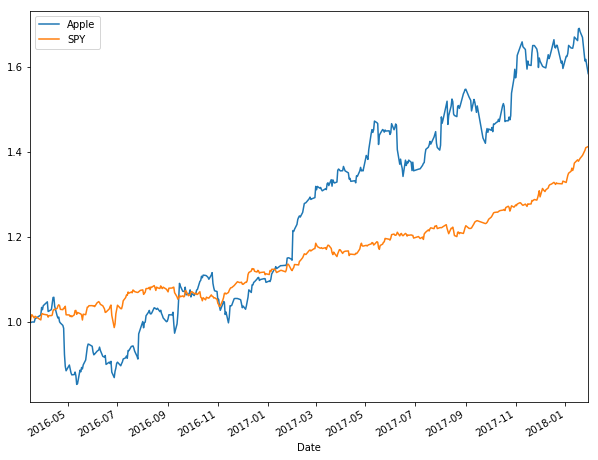

In [366]:
aapl['Cumulative'].plot(label='Apple',figsize=(10,8))
spy['Cumulative'].plot(label='SPY',figsize=(10,8))
plt.legend()

In [367]:
aapl['Daily Return']=aapl['Close'].pct_change(1)
spy['Daily Return']=spy['Last Close'].pct_change(1)

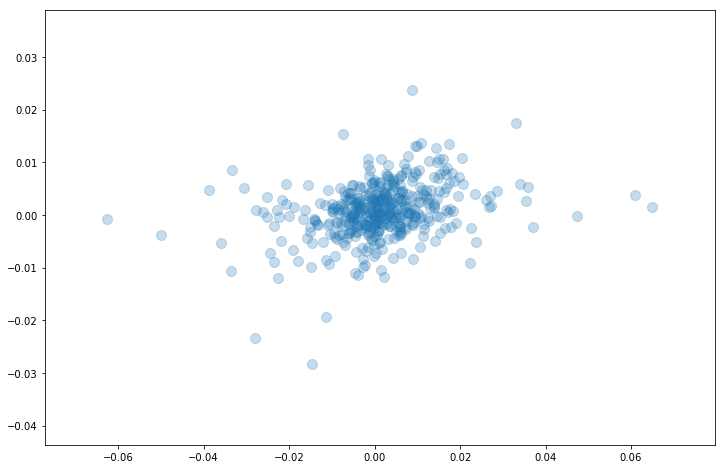

In [373]:
plt.figure(figsize=(12,8))
plt.scatter(aapl['Daily Return'],spy['Daily Return'],alpha=0.25,s=100)

In [376]:
beta,alpha,r_value,p_value,std_err=stats.linregress(aapl['Daily Return'].iloc[1:],spy['Daily Return'].iloc[1:])
#have to start at index 1 because can't pass null values and 0 has null for daily return

In [377]:
beta

0.12669699025499784

In [378]:
alpha

0.00067353163697702451

In [379]:
r_value

0.30983064227645984

In [380]:
spy['Daily Return'].head()

Date
2016-03-16         NaN
2016-03-17    0.010660
2016-03-18    0.006055
2016-03-21   -0.007718
2016-03-22    0.004011
Name: Daily Return, dtype: float64

In [382]:
noise=np.random.normal(loc=0,scale=0.001,size=len(spy['Daily Return'].iloc[1:]))  #loc is mean, scale is std

In [383]:
noise

array([  9.90467695e-04,  -1.40432167e-03,  -4.17151199e-04,
        -4.90328271e-04,   1.38376876e-03,   1.03936535e-04,
         6.57805585e-05,  -5.32035980e-05,  -7.53271446e-04,
        -2.32939704e-04,  -9.27878371e-06,  -6.10360013e-04,
         6.12046031e-04,  -1.92740194e-03,  -7.64406652e-04,
        -8.47922043e-04,  -2.41341352e-03,  -5.08065449e-04,
         6.35857069e-04,   1.56434012e-03,   1.25714584e-04,
        -1.06641938e-03,  -1.42667684e-04,  -7.91458919e-04,
         1.30451202e-03,  -7.18963942e-04,  -2.07902868e-03,
         3.13083160e-05,  -1.84938842e-03,  -7.72529631e-04,
        -6.88032889e-04,   1.34655697e-04,   5.51658616e-04,
         7.12439688e-04,   4.35656743e-04,  -3.68977413e-04,
        -3.38188825e-05,   1.51141576e-03,   2.46651268e-03,
        -4.37403702e-04,   7.30316963e-04,   3.98507561e-04,
         1.22920773e-03,   5.87814192e-04,   5.21997512e-04,
        -7.48251156e-04,   6.52551394e-04,  -7.79255041e-04,
         8.78774154e-04,

In [384]:
spy['Daily Return'].iloc[1:]+noise

Date
2016-03-17    0.011651
2016-03-18    0.004651
2016-03-21   -0.008135
2016-03-22    0.003521
2016-03-29   -0.007045
2016-03-30    0.013469
2016-03-31    0.001472
2016-04-01   -0.001457
2016-04-06   -0.002402
2016-04-07   -0.005284
2016-04-08    0.003505
2016-04-11   -0.000610
2016-04-12    0.001925
2016-04-13    0.008080
2016-04-14    0.002170
2016-04-15   -0.001136
2016-04-18    0.000321
2016-04-19    0.005185
2016-04-20    0.003205
2016-04-21   -0.000428
2016-04-22   -0.008337
2016-04-25   -0.001738
2016-04-26    0.003456
2016-04-27   -0.001652
2016-04-28    0.006377
2016-04-29   -0.020143
2016-05-03   -0.002467
2016-05-04   -0.003611
2016-05-05    0.000295
2016-05-06   -0.003399
                ...   
2017-12-08    0.001698
2017-12-11    0.003624
2017-12-12    0.004403
2017-12-13    0.001468
2017-12-15    0.002960
2017-12-18    0.002291
2017-12-19   -0.002343
2017-12-20   -0.003215
2017-12-21    0.002947
2017-12-22   -0.001344
2017-12-27   -0.000949
2017-12-28    0.001298
2017-1

In [385]:
fake_stock=spy['Daily Return'].iloc[1:]+noise

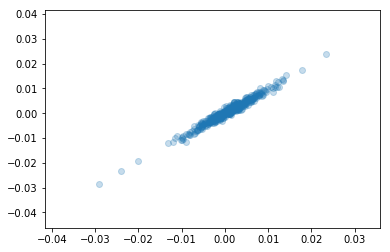

In [388]:
plt.scatter(fake_stock,spy['Daily Return'].iloc[1:],alpha=0.25)  #should be linear except for noise, thus thickness of line

In [390]:
beta,alpha,r_value,p_value,std_err=stats.linregress(fake_stock,spy['Daily Return'].iloc[1:])

In [391]:
beta

0.96647908122283366

In [392]:
alpha

6.2767506444282809e-05

In [394]:
l=[3,4,2,5]
l[-2:]

[2, 5]